In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [3]:
df.loc[df.Species==0, 'Species'] = 'Setosa'
df.loc[df.Species==1, 'Species'] = 'Versicolor'
df.loc[df.Species==2, 'Species'] = 'Virginica'

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.Species.value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: Species, dtype: int64

In [9]:
X = df.iloc[: ,:-1]
y = df.Species

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [59]:
y_predict = model.predict (X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
accuracy_score(y_test, y_predict)

0.9333333333333333

In [62]:
pd.crosstab(y_test, y_predict)

col_0,Setosa,Versicolor,Virginica
Species,,,
Setosa,8,0,0
Versicolor,0,12,1
Virginica,0,1,8


In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.92      0.92      0.92        13
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [64]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

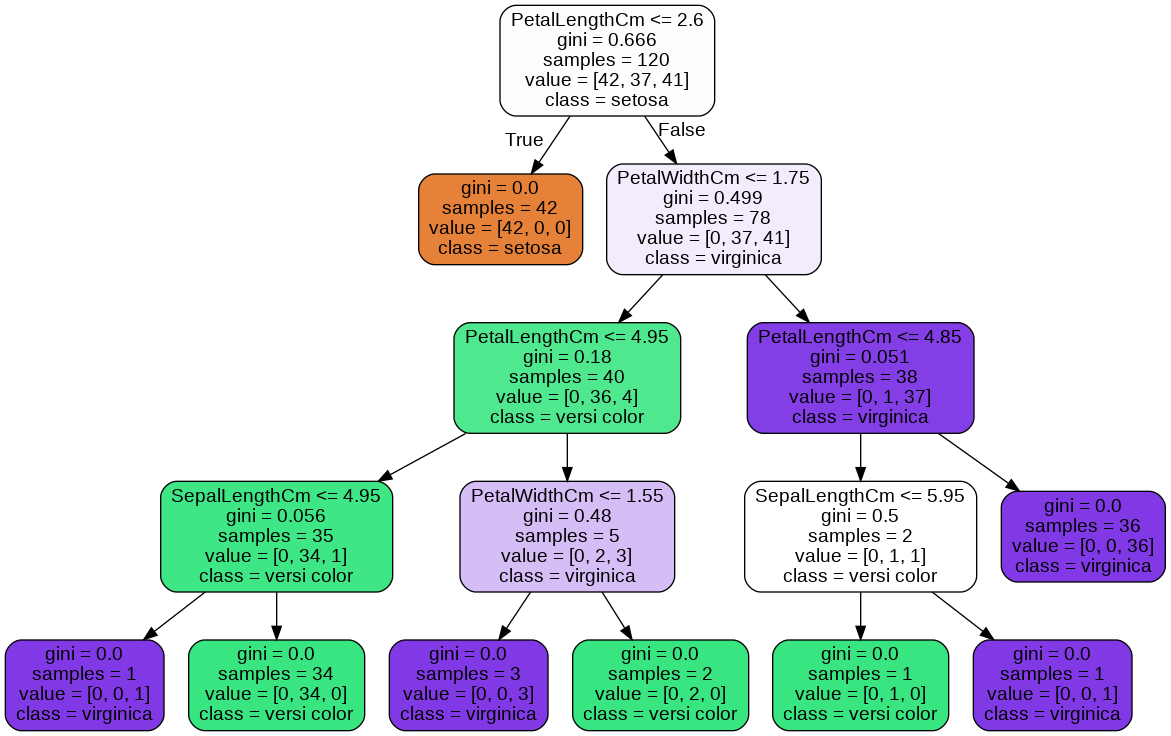

In [65]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True,
                feature_names = X.columns,
                class_names =['setosa', 'versi color','virginica'],
                rounded = True
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [66]:
y_predict = model.predict(X_train)
print ('Train data accuracy')
accuracy_score(y_train, y_predict)

Train data accuracy


1.0

In [67]:
y_predict_test = model.predict(X_test)
print ('Test data accuracy')
accuracy_score(y_test, y_predict_test)

Test data accuracy


0.9333333333333333